In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
diabetes = pd.read_csv('diabetes.csv')

In [14]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
diabetes.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

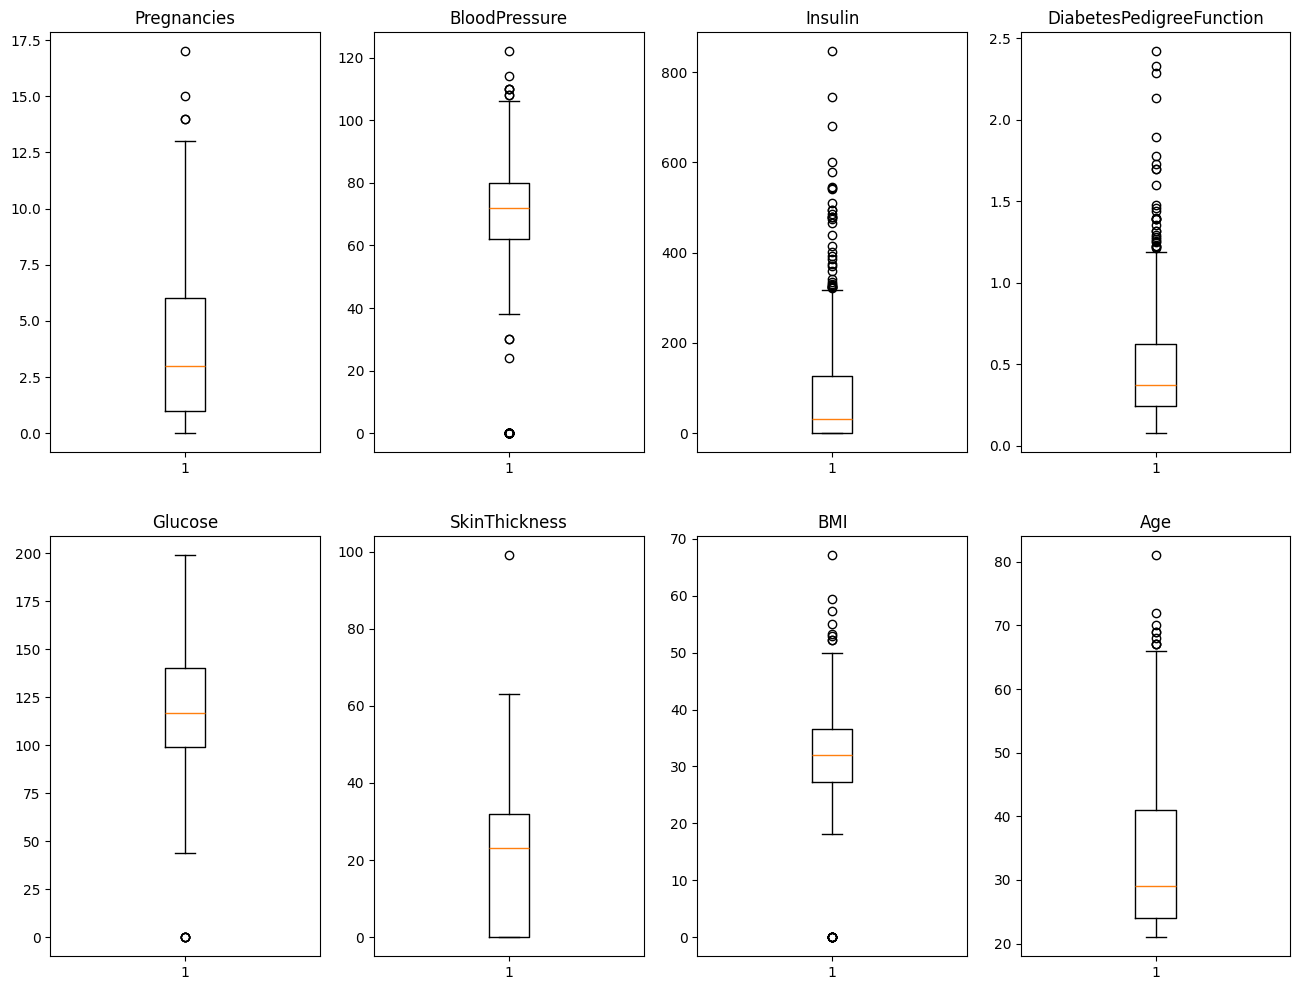

In [18]:
cols = list(diabetes.drop('Outcome', axis='columns').columns)

fig, axs = plt.subplots(2,4)

fig.set_figheight(12)
fig.set_figwidth(16)
x = 0

for i in range(len(cols)):
    if i % 2 == 0:
        axs[0,x].boxplot(diabetes[cols[i]])
        axs[0,x].set_title(cols[i])
    else:
        axs[1,x].boxplot(diabetes[cols[i]])
        axs[1,x].set_title(cols[i])
        x += 1

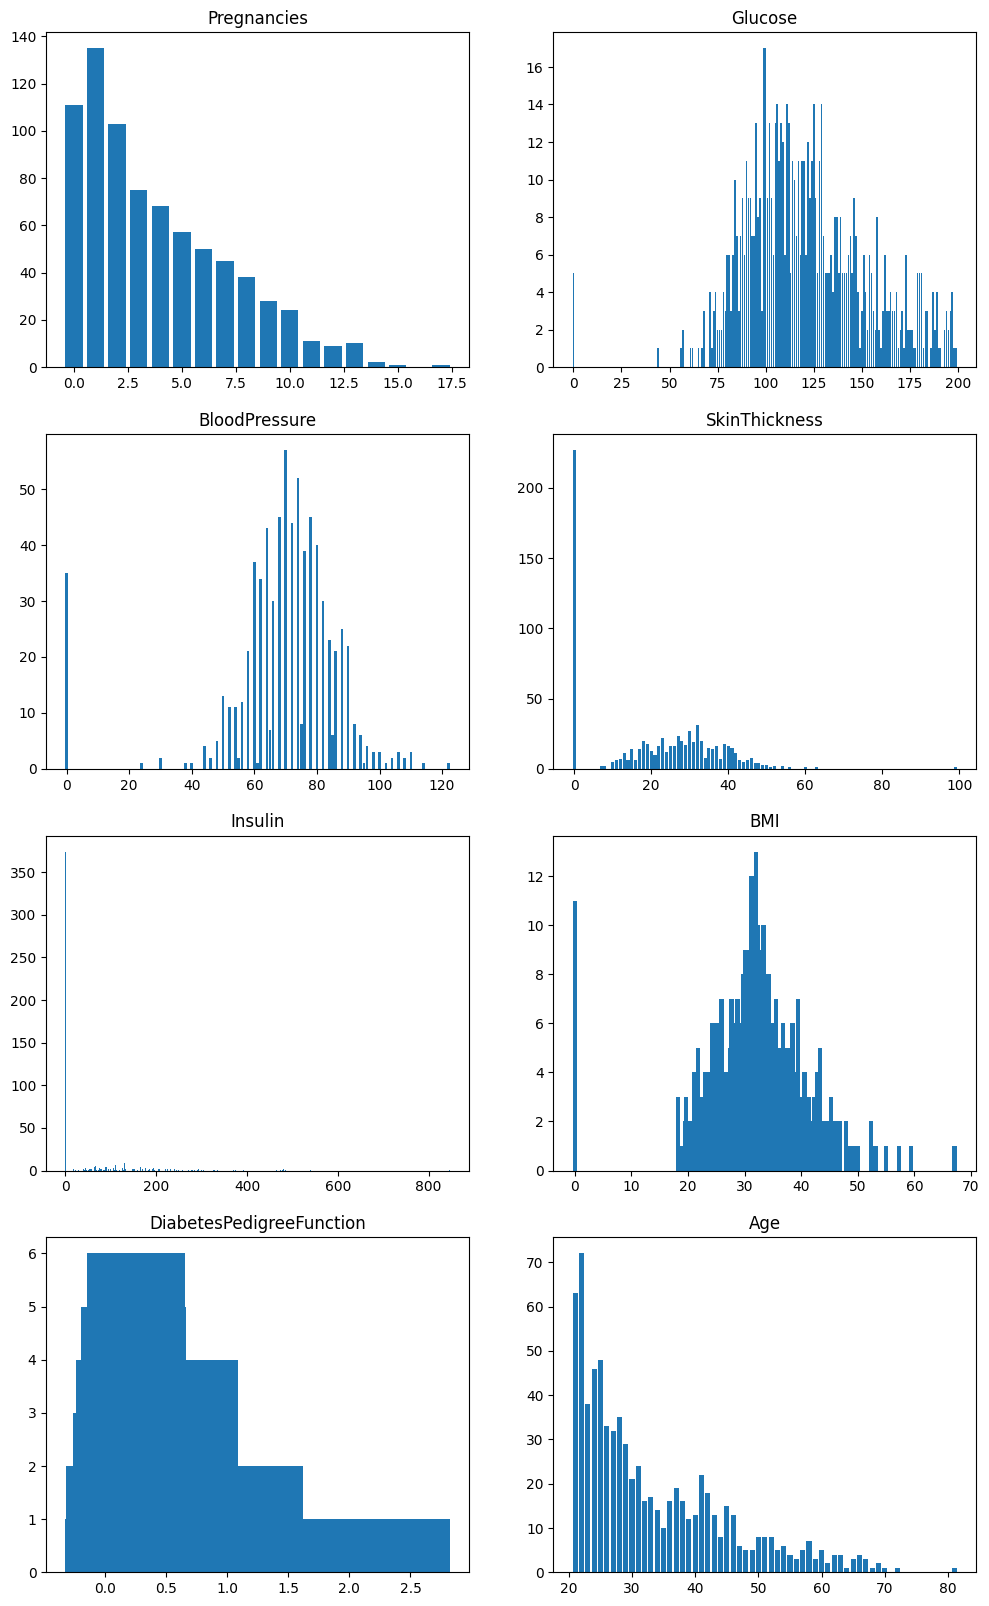

In [19]:
fig2, axs2 = plt.subplots(4,2)

fig2.set_figheight(20)
fig2.set_figwidth(12)
n = 0

for i in range(len(cols)):
    x = list(diabetes.groupby([cols[i]])['Outcome'].count().keys())
    height = list(diabetes.groupby([cols[i]])['Outcome'].count())
    if i % 2 == 0:
        axs2[n,0].bar(x=x, height=height)
        axs2[n,0].set_title(cols[i])
    else:
        axs2[n,1].bar(x=x, height=height)
        axs2[n,1].set_title(cols[i])
        n += 1

In [20]:
# Filling in missing data

cols_with_missing_data = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] 
# As noticed on the histograms the above columns have some 0 values, note there are zeroes 
# for pregnancies but it is possible and the distribution looks natural

diabetes_filled = diabetes.copy()

for col in cols_with_missing_data:
    diabetes_filled[col].replace(to_replace=0, method='ffill', inplace=True)
    diabetes_filled[col].replace(to_replace=0, method='bfill', inplace=True)

diabetes_filled.describe()

C:\Users\48795\AppData\Local\Temp\ipykernel_116936\932677074.py:10: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  diabetes_filled[col].replace(to_replace=0, method='ffill', inplace=True)
C:\Users\48795\AppData\Local\Temp\ipykernel_116936\932677074.py:11: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  diabetes_filled[col].replace(to_replace=0, method='bfill', inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.514323,72.308594,29.257812,157.084635,32.482031,0.471876,33.240885,0.348958
std,3.369578,30.531191,12.375474,10.544310,114.159085,6.908600,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,21.000000,78.750000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,130.000000,32.350000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,36.000000,193.250000,36.725000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


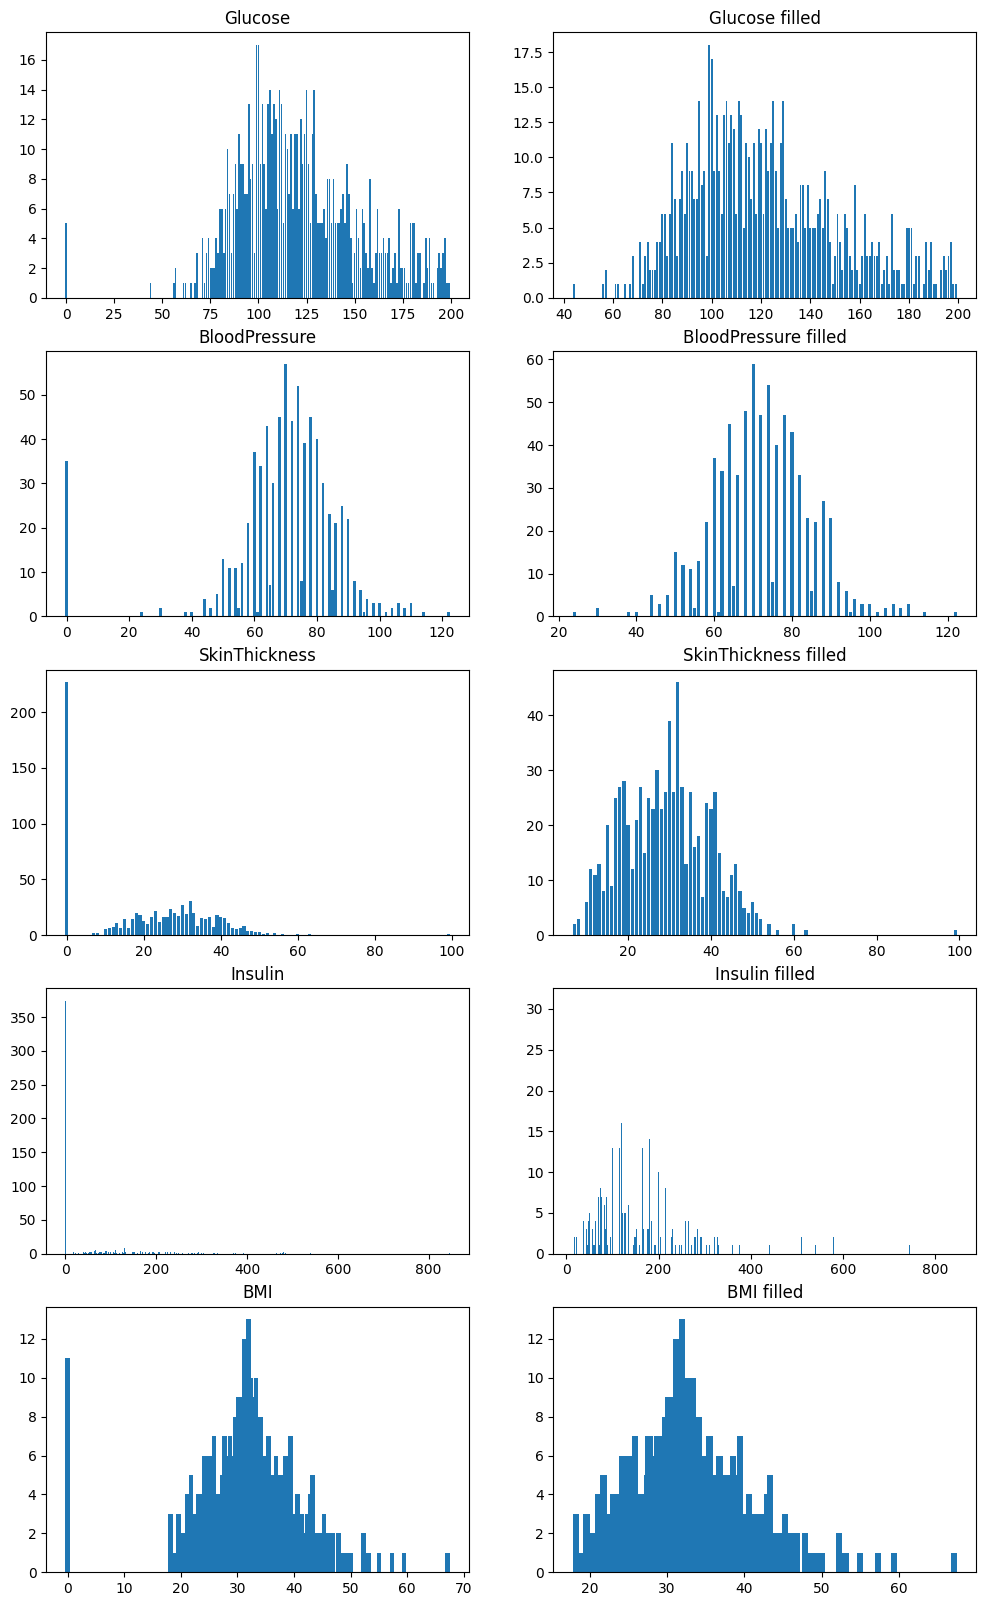

In [21]:
fig3, axs3 = plt.subplots(5,2)

fig3.set_figheight(20)
fig3.set_figwidth(12)

for i in range(len(cols_with_missing_data)):

    x = list(diabetes.groupby([cols_with_missing_data[i]])['Outcome'].count().keys())
    height = list(diabetes.groupby([cols_with_missing_data[i]])['Outcome'].count())

    x_filled = list(diabetes_filled.groupby([cols_with_missing_data[i]])['Outcome'].count().keys())
    height_filled = list(diabetes_filled.groupby([cols_with_missing_data[i]])['Outcome'].count())
   
    axs3[i,0].bar(x=x, height=height)
    axs3[i,0].set_title(cols_with_missing_data[i])

    title = cols_with_missing_data[i] + ' filled'
    axs3[i,1].bar(x=x_filled, height=height_filled)
    axs3[i,1].set_title(title)

Text(0.5, 1.0, 'Correlation Heatmap')

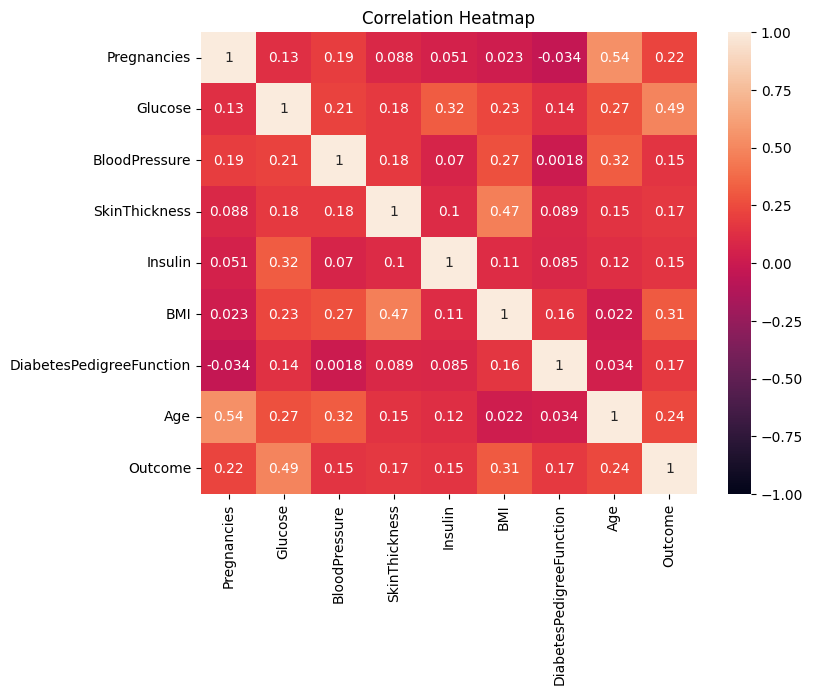

In [22]:
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(diabetes_filled.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')